In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import time

In [6]:
import importlib
import os.path

### Construct a data frame containing all training data sequences and combine with target probability distribution into one dataframe

In [7]:
root = 'data/train'
file_paths = os.listdir(root)
rel_file_paths = [os.path.join(root, x) for x in file_paths]

In [8]:
rel_file_paths[1]

'data/train\\00001'

In [9]:
training_sequences = []

for i in range(1,len(rel_file_paths)):
    sequence = pd.read_csv(rel_file_paths[i]+'/columns_1000ms.csv')
    sequence_targets =  pd.read_csv(rel_file_paths[i]+'/targets.csv')
    
    if sequence.shape[0] == sequence_targets.shape[0]:
        sequence_complete = pd.concat([sequence , sequence_targets] , axis = 1)
        sequence_final = sequence_complete.dropna(subset=sequence_targets.columns) 
        deleted = ((sequence_complete.shape[0] - sequence_final.shape[0]) / sequence_complete.shape[0])*100
        print('sequence ' + str(rel_file_paths[i][-2:]) + ', ' + str(int(deleted)) + '% of rows deleted')
        training_sequences.append(sequence_final)
        
    else:
        print('Number of rows for sequence data and target do not match for sequence ' + str(rel_file_paths[i][-2:]))

sequence 01, 4% of rows deleted
sequence 02, 2% of rows deleted
sequence 03, 5% of rows deleted
sequence 04, 2% of rows deleted
sequence 05, 3% of rows deleted
sequence 06, 3% of rows deleted
sequence 07, 1% of rows deleted
sequence 08, 4% of rows deleted
sequence 09, 1% of rows deleted
sequence 10, 1% of rows deleted


In [10]:
training_data_full = pd.concat(training_sequences)
training_data_full

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,p_stand,t_bend,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
48,0.6807,0.472910,-0.158,0.838,1.632,13.614,-0.3598,0.202494,-0.994,-0.350,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
49,0.8571,0.109839,0.470,0.879,1.020,17.142,-0.4462,0.119504,-0.820,-0.428,...,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05
50,0.6775,0.233024,0.104,0.802,0.888,13.550,-0.6250,0.227178,-1.112,-0.538,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.8691,0.006587,-0.882,-0.868,-0.858,-17.382,0.3636,0.006248,0.352,0.366,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1788,-0.8709,0.006913,-0.884,-0.868,-0.862,-17.418,0.3621,0.008955,0.344,0.365,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1789,-0.8668,0.010685,-0.890,-0.866,-0.848,-17.336,0.3586,0.011868,0.328,0.359,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1790,-0.8706,0.007800,-0.888,-0.869,-0.858,-17.412,0.3578,0.010157,0.328,0.358,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


### Count the number of NANs per column

In [11]:
training_data_trimmed = training_data_full.copy()

In [12]:
na_vals_per_column = []
for col in training_data_full.columns[:366]:
    n = training_data_full[col].isna().sum()
    na_vals_per_column.append(n)

    if n > (len(training_data_full) / 2):
        #print(col)
        training_data_trimmed.drop(col , axis=1 , inplace=True)
        

Text(10.049999999999997, 0.5, 'Frequency')

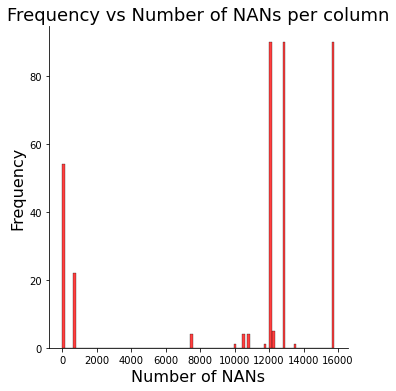

In [13]:
sns.displot(na_vals_per_column, kde=False, color='red', bins=100)
plt.title('Frequency vs Number of NANs per column', fontsize=18)
plt.xlabel('Number of NANs', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [14]:
training_data_trimmed.head()

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,p_stand,t_bend,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
48,0.6807,0.472910,-0.158,0.838,1.632,13.614,-0.3598,0.202494,-0.994,-0.350,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
49,0.8571,0.109839,0.470,0.879,1.020,17.142,-0.4462,0.119504,-0.820,-0.428,...,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05
50,0.6775,0.233024,0.104,0.802,0.888,13.550,-0.6250,0.227178,-1.112,-0.538,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50


### Impute the missing values with their mean for now

In [15]:
for col in training_data_trimmed.columns:
    training_data_trimmed[col].fillna(training_data_trimmed[col].mean(), inplace = True) 

In [16]:
for col in training_data_trimmed.columns:
    if training_data_trimmed[col].isna().sum() > 0: 
        print('you have some nans left in the dataset mate')
        print(col)
    else: 
        pass
print('No nans remaining in the dataset')

No nans remaining in the dataset


In [17]:
#Drop the start and end columns 
try:
    training_data_trimmed.drop(['start' , 'end'] , axis=1 , inplace=True)
except KeyError:
    print('already removed')

In [41]:
#Test if there are any NANs in your pandas dataframe 
training_data_trimmed.isnull().values.any()

False

### Assess level of agreement for the annotators

In [42]:
target_cols = training_data_trimmed.columns[-20:]

In [43]:
targets = training_data_trimmed[target_cols].copy()
targets['maximum'] = targets.max(axis = 1)

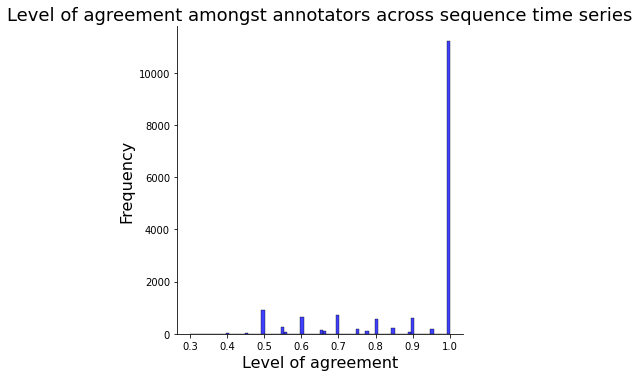

In [44]:
ax = sns.displot(targets['maximum'], kde=False, color='blue')
plt.title('Level of agreement amongst annotators across sequence time series', fontsize=18)
plt.xlabel('Level of agreement', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.rcParams['figure.figsize']=(30,30)


"for p in ax.patches:\n    height = p.get_height() # get the height of each bar\n    ax.text(x = p.get_x()+(p.get_width()/2), y = height+0.2 , s = '{:.0f}'.format(height) , ha = 'center')"

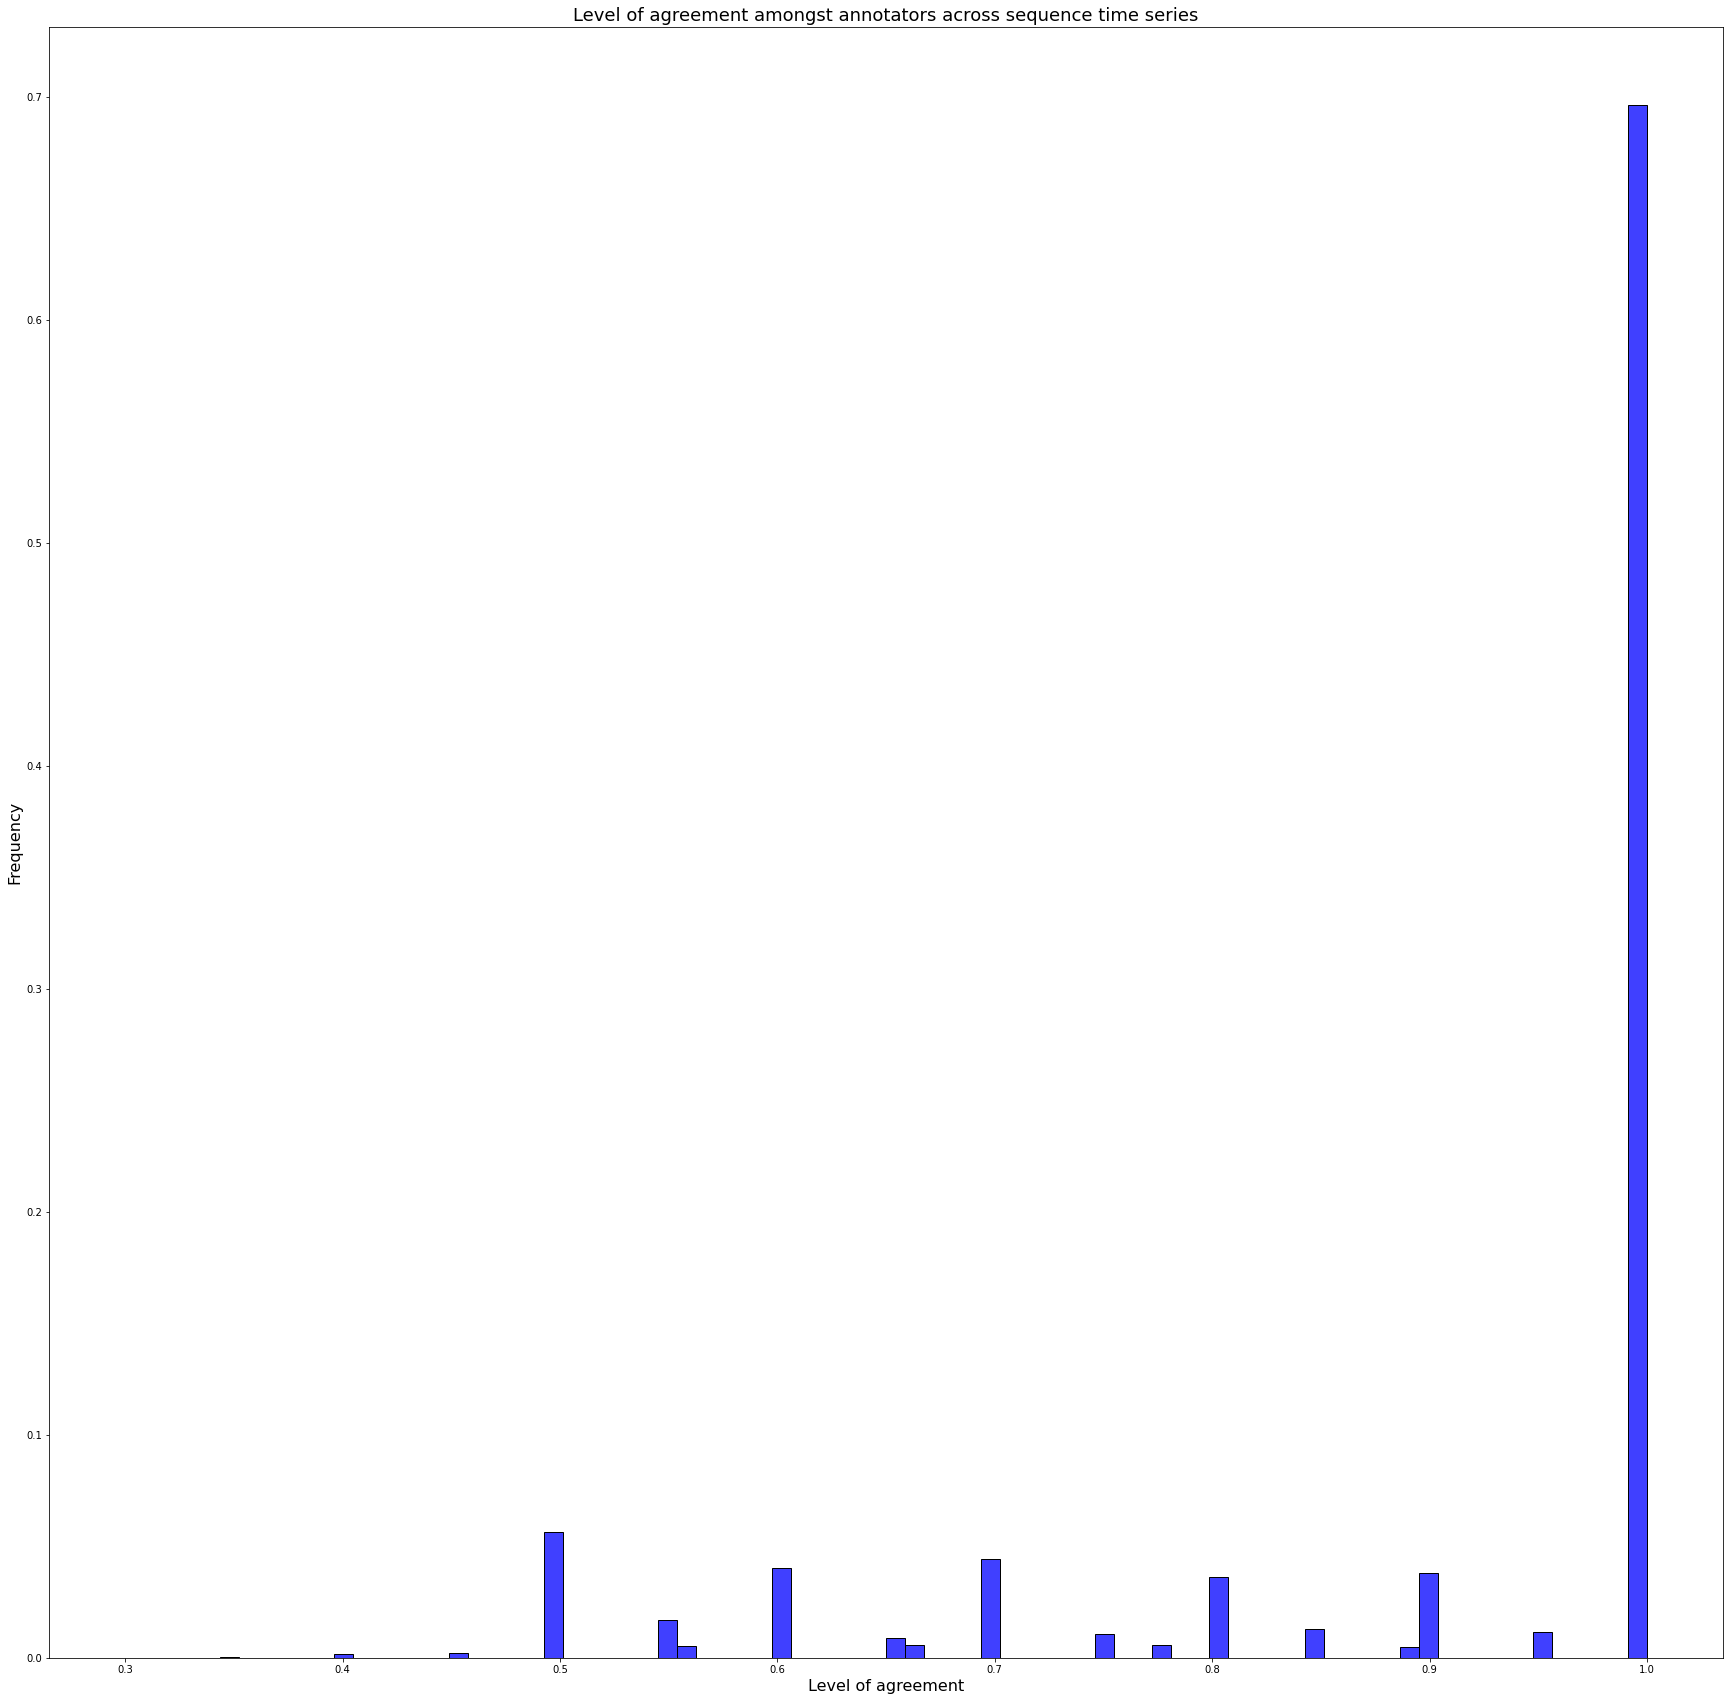

In [30]:
ax = sns.histplot(targets['maximum'], kde=False, color='blue', stat="probability" )
plt.title('Level of agreement amongst annotators across sequence time series', fontsize=18)
plt.xlabel('Level of agreement', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.rcParams['figure.figsize']=(10,4)

'''for p in ax.patches:
    height = p.get_height() # get the height of each bar
    ax.text(x = p.get_x()+(p.get_width()/2), y = height+0.2 , s = '{:.0f}'.format(height) , ha = 'center')'''

    

In [ ]:

# label each bar in histogram
for p in ax.patches:
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = 'center' # sets horizontal alignment (ha) to center

In [45]:
#generate a table to show percentage of datapoints with different max 
max_target_val = targets['maximum']

#Table values to be in range from 0.4 to 1
label_confidence = [i/100 for i in range(40,105,5)]

percentage_of_datapoints = []

for i in label_confidence:
    count = 0 
    for j in max_target_val: 
        if j >= i:
            count += 1 
    percentage_of_datapoints.append((count*100)/len(max_target_val))

In [48]:
label_confidence_df = pd.DataFrame(list(zip(label_confidence, percentage_of_datapoints)), columns =['label_confidence', 'percentage_of_datapoints'])

In [49]:
label_confidence_df

,label_confidence,percentage_of_datapoints
0,0.40,99.925484
1,0.45,99.714357
2,0.50,99.484600
3,0.55,93.833830
4,0.60,91.610780
5,0.65,87.586935
6,0.70,86.140089
7,0.75,81.718828
8,0.80,80.079483
9,0.85,76.440636


#### Prepare training data : Adjusting the target label to be the maximum value activity and then encoding the labels

In [50]:
targets.head(2)

,a_ascend,a_descend,a_jump,a_loadwalk,a_walk,p_bent,p_kneel,p_lie,p_sit,p_squat,...,t_bend,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum
46,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
if 'max_label' in targets.columns:
    print('max labels already added')
else:
    targets['max_label'] =  targets.idxmax(axis=1)

In [52]:
targets.head(3)

,a_ascend,a_descend,a_jump,a_loadwalk,a_walk,p_bent,p_kneel,p_lie,p_sit,p_squat,...,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum,max_label
46,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,a_walk
47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,a_walk
48,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,a_walk


In [53]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [54]:
input_classes = ['a_ascend', 'a_descend', 'a_jump' , 'a_loadwalk' , 'a_walk', 'p_bent', 'p_kneel', 
 'p_lie', 'p_sit', 'p_squat', 'p_stand', 't_bend', 't_kneel_stand', 't_lie_sit' ,
't_sit_lie' , 't_sit_stand', 't_stand_kneel', 't_stand_sit', 't_straighten', 't_turn']

In [55]:
label_encoder.fit(input_classes)

LabelEncoder()

In [56]:
targets['max_label_encoded'] = label_encoder.transform(targets['max_label'])

In [57]:
targets['max_label_encoded'].describe()

count    16104.000000
mean         9.075882
std          3.873515
min          0.000000
25%          7.000000
50%         10.000000
75%         10.000000
max         19.000000
Name: max_label_encoded, dtype: float64

In [58]:
targets.head()

,a_ascend,a_descend,a_jump,a_loadwalk,a_walk,p_bent,p_kneel,p_lie,p_sit,p_squat,...,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum,max_label,max_label_encoded
46,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,a_walk,4
47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,a_walk,4
48,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.50,a_walk,4
49,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.55,p_stand,10
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.50,p_stand,10


Twenty (posture/ambulation) activities labels are annotated in our dataset, and these are enumerated below together with short descriptions: 

1.	a_ascend: ascent stairs;
2.	a_descend: descent stairs;
3.	a_jump: jump;
4.	a_loadwalk: walk with load;
5.	a_walk: walk;
6.	p_bent: bending;
7.	p_kneel: kneeling;
8.	p_lie: lying;
9.	p_sit: sitting;
10.	p_squat: squatting;
11.	p_stand: standing;
12.	t_bend: stand-to-bend;
13.	t_kneel stand: kneel-to-stand;
14.	t_lie_sit: lie-to-sit;
15.	t_sit_lie: sit-to-lie;
16.	t_sit_stand: sit-to-stand;
17.	t_stand_kneel: stand-to-kneel;
18.	t_stand_sit: stand-to-sit;
19.	t_straighten: bend-to-stand; and
20.	t_turn: turn

The prefix ‘a_’ on a label indicates an ambulation activity (i.e. an activity requiring of continuing movement), the prefix ‘p_’ indicate static postures (i.e. times when the participants are stationary), and the prefix ‘t_’ indicate posture-to-posture transitions

Labels have been encoded in the targets dataframe 
Next training data must be generated for use in training models. Generate a dataframe that contains only 'confident data'. 

In [59]:
## Generating dataframe that contains all features , aswell as max_target value and max_target encoded label 

training_data_frame = training_data_trimmed[training_data_trimmed.columns[:80]].copy()
training_data_frame['maximum'] = targets['maximum'].copy()
training_data_frame['max_label_encoded'] = targets['max_label_encoded'].copy()

In [60]:
training_data_frame.head()
#This is a dataframe with 82 features and two target columns , one with max target value and one with the maximum valued label (in encoded form)

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,pir_study_max,pir_study_sum,pir_toilet_mean,pir_toilet_std,pir_toilet_min,pir_toilet_median,pir_toilet_max,pir_toilet_sum,maximum,max_label_encoded
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,4
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,4
48,0.6807,0.472910,-0.158,0.838,1.632,13.614,-0.3598,0.202494,-0.994,-0.350,...,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,4
49,0.8571,0.109839,0.470,0.879,1.020,17.142,-0.4462,0.119504,-0.820,-0.428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,10
50,0.6775,0.233024,0.104,0.802,0.888,13.550,-0.6250,0.227178,-1.112,-0.538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,10


In [61]:
len(training_data_frame)

16104

In [64]:
#Check for any NANs in the dataframe
training_data_frame.isnull().sum().sum()

0

In [272]:
#Choose the rows with a confidence of 0.8 or higher for model training 
# This generates 3 dfs 1. All data , 2. Confident data , 3. Low confidence data 

In [65]:
confident_training_data = training_data_frame.copy()
confident_training_data = confident_training_data[confident_training_data.maximum >= 0.8]

low_confidence_data = training_data_frame.copy()
low_confidence_data = low_confidence_data[low_confidence_data.maximum < 0.8]


In [68]:
#Test that row counts are as expected 
l = len(low_confidence_data) 
h = len(confident_training_data)
m = len(training_data_frame)

if l+h == m: 
    print('row counts as expected')
else:
    print('unexpected row counts, potential error')


print(str(l) + ' ,' + str(h) +  ' ,' + str(m))

row counts as expected
3208 ,12896 ,16104


In [322]:
confident_training_data

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,pir_study_max,pir_study_sum,pir_toilet_mean,pir_toilet_std,pir_toilet_min,pir_toilet_median,pir_toilet_max,pir_toilet_sum,maximum,max_label_encoded
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
54,0.9452,0.031543,0.870,0.943,1.016,18.904,-0.2523,0.027388,-0.296,-0.249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
55,0.9436,0.011110,0.920,0.943,0.960,18.872,-0.2778,0.009652,-0.304,-0.276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
56,0.9424,0.011517,0.912,0.945,0.962,18.848,-0.2719,0.008282,-0.288,-0.271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.8691,0.006587,-0.882,-0.868,-0.858,-17.382,0.3636,0.006248,0.352,0.366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
1788,-0.8709,0.006913,-0.884,-0.868,-0.862,-17.418,0.3621,0.008955,0.344,0.365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
1789,-0.8668,0.010685,-0.890,-0.866,-0.848,-17.336,0.3586,0.011868,0.328,0.359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
1790,-0.8706,0.007800,-0.888,-0.869,-0.858,-17.412,0.3578,0.010157,0.328,0.358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10


In [69]:
#Check for any NANs in the dataframe
confident_training_data.isnull().sum().sum()

0

## Implement an algorithm

In [72]:
confident_training_data_original_index = confident_training_data.copy()

In [80]:
confident_training_data = confident_training_data.reset_index()
confident_training_data.drop(columns = 'index', inplace = True)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [82]:
model = DecisionTreeClassifier()

In [83]:
feature_cols = confident_training_data.columns[:80]

train_x = confident_training_data[feature_cols].values
train_y = confident_training_data['max_label_encoded'].values

In [87]:
# Need to check the data for NANs because we are getting an error regarding NANS 
confident_training_data.isnull().values.any()

False

In [88]:
confident_training_data[feature_cols]

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,pir_study_min,pir_study_median,pir_study_max,pir_study_sum,pir_toilet_mean,pir_toilet_std,pir_toilet_min,pir_toilet_median,pir_toilet_max,pir_toilet_sum
0,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,1.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,1.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.9452,0.031543,0.870,0.943,1.016,18.904,-0.2523,0.027388,-0.296,-0.249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.9436,0.011110,0.920,0.943,0.960,18.872,-0.2778,0.009652,-0.304,-0.276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9424,0.011517,0.912,0.945,0.962,18.848,-0.2719,0.008282,-0.288,-0.271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12891,-0.8691,0.006587,-0.882,-0.868,-0.858,-17.382,0.3636,0.006248,0.352,0.366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12892,-0.8709,0.006913,-0.884,-0.868,-0.862,-17.418,0.3621,0.008955,0.344,0.365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12893,-0.8668,0.010685,-0.890,-0.866,-0.848,-17.336,0.3586,0.011868,0.328,0.359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12894,-0.8706,0.007800,-0.888,-0.869,-0.858,-17.412,0.3578,0.010157,0.328,0.358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
X = np.asanyarray(train_x)
y = np.asanyarray(train_y)
#y = np.ravel(y)

In [90]:
scores = cross_validate(model, X, y, cv=5, scoring=("r2","neg_mean_absolute_error", "neg_mean_squared_error"))

In [91]:
#Compute error metrics
MAE = scores["test_neg_mean_absolute_error"].mean() * -1
MSE = scores['test_neg_mean_absolute_error'].mean() * -1
R2 = scores['test_r2'].mean()
#Add error results to data frame
results = {'MAE' : [MAE]  ,'MSE' : [MSE] , 'R^2': [R2]}
res_d = pd.DataFrame(data=results)

In [92]:
res_d

,MAE,MSE,R^2
0,2.766283,2.766283,-0.866151
